## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

from scipy import stats

## Lab introduction

Many of the commonly used random variables are related to each other through combinations, transformations, or both. Mathematical statistics shows us how to do the theoretical work of proving these relationships between random variables.

It can also be useful to use simulations involving random sampling from distributions to generate hypotheses about relationships between random variables. This lab will use simulations to explore the distribution of sums of independent exponential random variables. 

## Background example for using probability simulations

The following is an important theoretical result in statistics.

If $Z_1, Z_2, \ldots, Z_k$ are independent, standard normal random variables, then the sum of squares
$$Y = \sum_{i=1}^kZ_i^2$$
has a chi-squared distribution with $k$ degrees of freedom.



Use random sampling from 3 independent standard normal variables $Z_1, Z_2, Z_3$ to show that $$Y = \sum_{i=1}^3Z_i^2$$
has a chi-squared distribution with $3$ degrees of freedom. 


#### Solution

We are starting from 3 independent standard normal variables $Z_1, Z_2, Z_3$, so we will create 3 random varialbe objects in Python with the desired parameters.

In [2]:
Z1 = stats.norm(loc = 0, scale = 1)

Z2 = stats.norm(loc = 0, scale = 1)

Z3 = stats.norm(loc = 0, scale = 1)

We can approximate the distribution of $Y = \sum_{i=1}^3Z_i^2$ by sampling from these three normal distributions many times and adding their squared values. We will then compare the empirical distribution we generate to the theoretical disribution of a chi-squared distribution with $3$ degrees of freedom.


In [3]:
# Specify a large number of simulations to run.
number_simulations = 50_000

# Initialize an array to hold the simulation results.
y = np.zeros(number_simulations)

# Perform the transformation and combination on the simulated draws from the normal distributions.
for n in range(number_simulations):
  y[n] = (Z1.rvs())**2 + (Z2.rvs())**2 + (Z3.rvs())**2

Generate a random variable object for the proposed theoretical distribution.

In [4]:
# Chi-squared distribution with 3 degrees of freedom

Y = stats.chi2(df = 3)

Method 1 for assessment: Plot the histogram and compare to the pdf for $Y$ from the theoretical result.

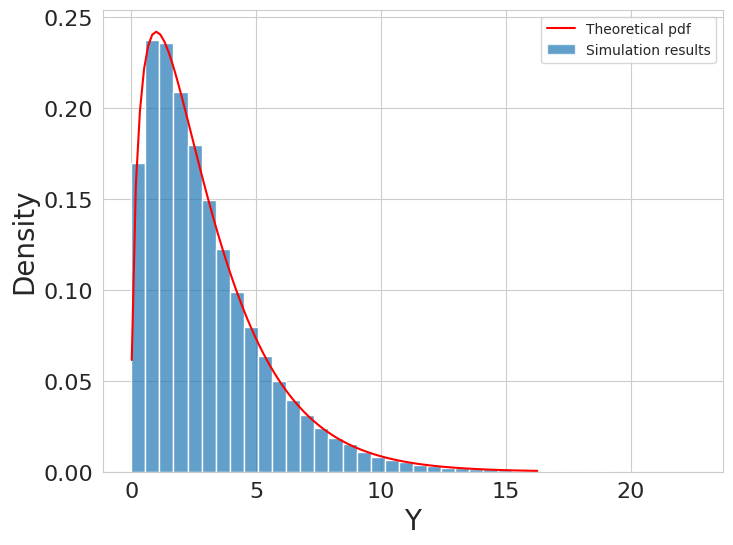

In [5]:
plt.figure(figsize = (8,6))
sns.histplot(y, stat = 'density', alpha = 0.7, bins = 40);

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('Y',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16)

# Plot the  pdf
y_p = np.linspace(Y.ppf(0.001),Y.ppf(0.999),100)
plt.plot(y_p, Y.pdf(y_p),'r')

# Legend
plt.legend(['Theoretical pdf', 'Simulation results']);

The empirical histogram matches the theoretical pdf very closely. This supports the result.

Method 2 for assessment: We can use a probability plot to compare the distributions.

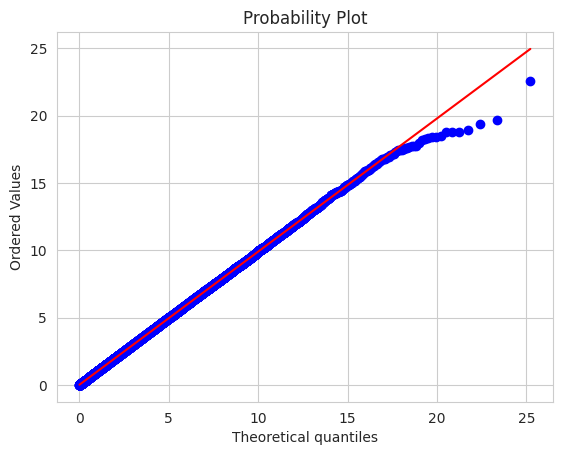

In [6]:
stats.probplot(y, dist='chi2', sparams=(3), plot = plt); 



The quantiles of the theoretical and empirical distributions match closely, except for extreme values. This often occurs in finite approximations to a distribution, so the probability plot supports the theoretical result.

## Lab 3 Problem

Let $X_i \sim \exp(\lambda)$, $i = 1, 2, \ldots, n$ be independent random variables.


Then, the sum $Y = \sum_{i = 1}^nX_i$
of $n$ independent exponential random variables with parameter $\lambda$ has a gamma distribution with shape parameter $a = n$ and rate parameter $\lambda$.


Use random sampling from 5 independent exponential random variables $X_1, X_2, \ldots, X_5$ with $\lambda = 0.5$ to show $Y = \sum_{i = 1}^nX_i$ has a gamma distribution with shape parameter $a = 5$ and rate parameter $\lambda = 0.5$.

### Solution

In [13]:
# 5 degrees of freedom for the gamma distribution
Y = stats.gamma(5)

In [14]:
#5 independent standard normal variables
Z1 = stats.norm(loc = 0, scale = 1)

Z2 = stats.norm(loc = 0, scale = 1)

Z3 = stats.norm(loc = 0, scale = 1)

Z4 = stats.norm(loc = 0, scale = 1)

Z5 = stats.norm(loc = 0, scale = 1)



In [15]:
#The number of simulations should be large
number_simulations = 50_000
#Arrat where simulation results can be stored
y = np.zeros(number_simulations)
#transformation or combination on the simulated draws from the distribution.
for n in range(number_simulations):
  y[n] = (Z1.rvs())**2 + (Z2.rvs())**2 + (Z3.rvs())**2 + (Z4.rvs())**2 + (Z5.rvs())**2

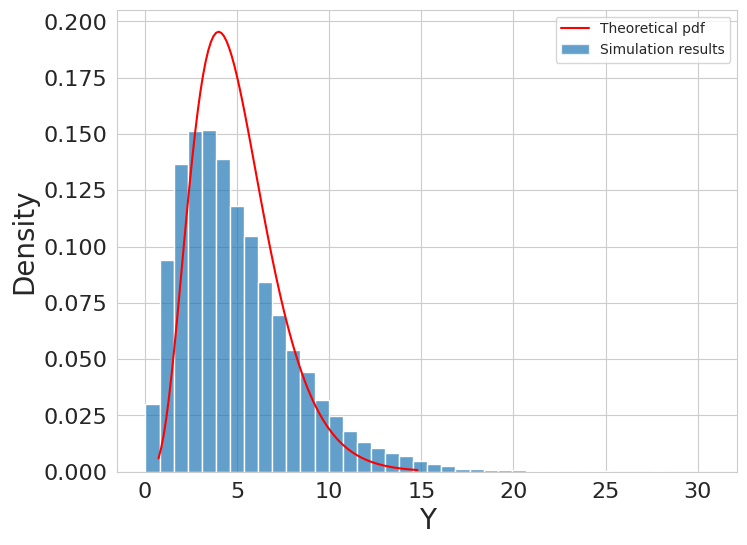

In [16]:
#Plotting the figure
plt.figure(figsize = (8,6))
sns.histplot(y, stat ='density', alpha = 0.7 , bins = 40);

#Labelling x and y axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('Y', fontsize = 20)

plt.tick_params(labelsize = 16)

#plot of pdf
y_p = np.linspace(Y.ppf(0.001), Y.ppf(0.999),100)
plt.plot(y_p, Y.pdf(y_p),'r')
#legend
plt.legend(['Theoretical pdf', 'Simulation results'])

The results are not supported since the empirical histogram does not correspond the theoretical pdf.

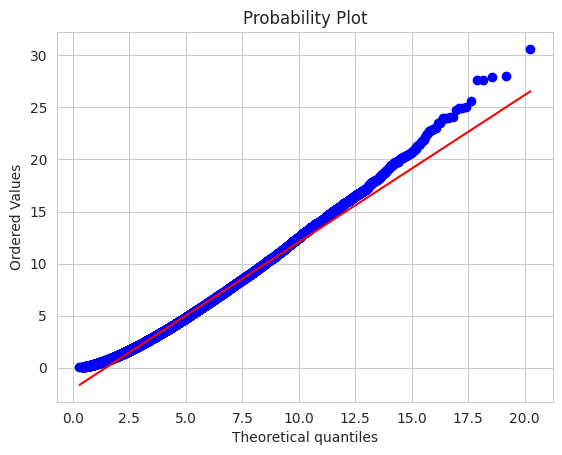

In [17]:

stats.probplot(y, dist='gamma', sparams=(5), plot = plt);

Theoretical result is not support by the plot because both theoretical quantiles and empirical distributions match really well until around 12.5 on the theoretical quantiles axes where the trend of each one became different.